In [1]:
from PIL import Image
import scipy
import binascii
import numpy as np
import scipy.misc
import cv2
import scipy.cluster
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## part 1 & 2

In [2]:
def zip(*iterables):
    # zip('ABCD', 'xy') --> Ax By
    finallist = []
    sentinel = object()
    iterators = [iter(it) for it in iterables]
    while iterators:
        result = []
        for it in iterators:
            elem = next(it, sentinel)
            if elem is sentinel:
                return finallist
            result.append(elem)
        finallist.append(result)

In [3]:
def myColorbar(img,k1):
    colors, count = np.unique(img.reshape(img.shape[0]*img.shape[1],3), axis=0, return_counts=True)
    list2 = zip(colors,count)
    k = int(k1)
    chart = np.zeros((100,1000,3), np.uint8)
    start = 0
    list2.sort(key = lambda x: x[1])
    length = len(list2)
    list2 = list2[length-k:length]
    count = count[length-k:length]
    sumcomp = sum(count)
    length = len(list2)
    for m in range(k):
        end = start + (1000/k)
        r = int(list2[m][0][0])
        # print(r,g,b)
        g = int(list2[m][0][1])
        b = int(list2[m][0][2])
#         print(r,g,b)

        cv2.rectangle(chart, (int(start), 0), (int(end), 100), (r,g,b), -1)
        start = end

    return chart

In [4]:
def linContrastStretching(filename,a,b,k):

    img2 = cv2.imread(filename)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    cbar1 = myColorbar(img2,k)

    img = Image.open(filename)
    h = img.size[1]
    w = img.size[0]
    imVal = img.load()
    smallest = np.amin(img)
    biggest = np.amax(img)
    # print(imVal[23,34])
    new = np.zeros([h,w,3],dtype=np.uint8)  #((pixel – min) / (max – min))*255.
    # print(new[23,34])
    for i in range(h):
        for j in range(w):
            new[i,j][0] = ((imVal[j,i][0] - smallest)/biggest) * (b - a) + a
            new[i,j][1] = ((imVal[j,i][1] - smallest)/biggest) * (b - a) + a
            new[i,j][2] = ((imVal[j,i][2] - smallest)/biggest) * (b - a) + a



    smallest1 = np.amin(new)
    biggest1 = np.amax(new)

    cbar2 = myColorbar(new,k)

    fig = plt.figure()
    plt.subplot(2,2,1)
    plt.imshow(img, cmap = 'gray',vmin= smallest, vmax = biggest)
    plt.title("Original")
    plt.subplot(2,2,2)
    plt.imshow(new, cmap ='gray', vmin=smallest1, vmax =biggest1)
    plt.title("New")
    plt.subplot(2,2,3)
    plt.axis("off")
    plt.imshow(cbar1)
    plt.subplot(2,2,4)
    plt.axis("off")
    plt.imshow(cbar2,'gray')
#     plt.axis("off")

    plt.show()


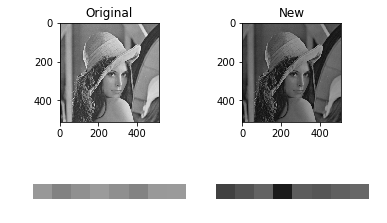

In [5]:
im = "../input_data/lena.jpg"
# im2 = '../input_data/part4.png'
linContrastStretching(im,10,200,8)
# plt.imshow(final)

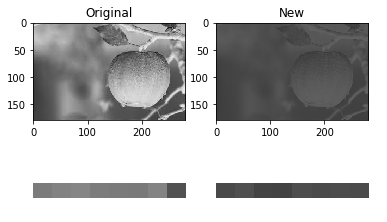

In [182]:
im = "../input_data/gray.jpeg"
linContrastStretching(im,50,100,8)

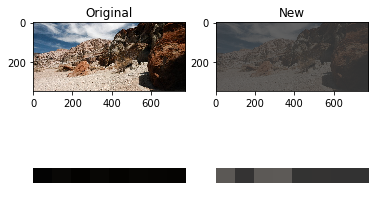

In [183]:
im = "../input_data/canyon.png"
linContrastStretching(im,50,100,8)